Missing Values

Number of instances = 1139
Number of attributes = 16
  country_name                    indicator_name     sex age_group  \
0  Afghanistan  Unemployment rate by sex and age  Female     15-24   
1  Afghanistan  Unemployment rate by sex and age  Female       25+   
2  Afghanistan  Unemployment rate by sex and age  Female  Under 15   
3  Afghanistan  Unemployment rate by sex and age    Male     15-24   
4  Afghanistan  Unemployment rate by sex and age    Male       25+   

  age_categories    2014    2015    2016    2017    2018    2019    2020  \
0          Youth  13.340  15.974  18.570  21.137  20.649  20.154  21.228   
1         Adults   8.576   9.014   9.463   9.920  11.223  12.587  14.079   
2       Children  10.306  11.552  12.789  14.017  14.706  15.418  16.783   
3          Youth   9.206  11.502  13.772  16.027  15.199  14.361  14.452   
4         Adults   6.463   6.879   7.301   7.728   7.833   7.961   8.732   

     2021    2022    2023    2024  
0  21.640  30.561

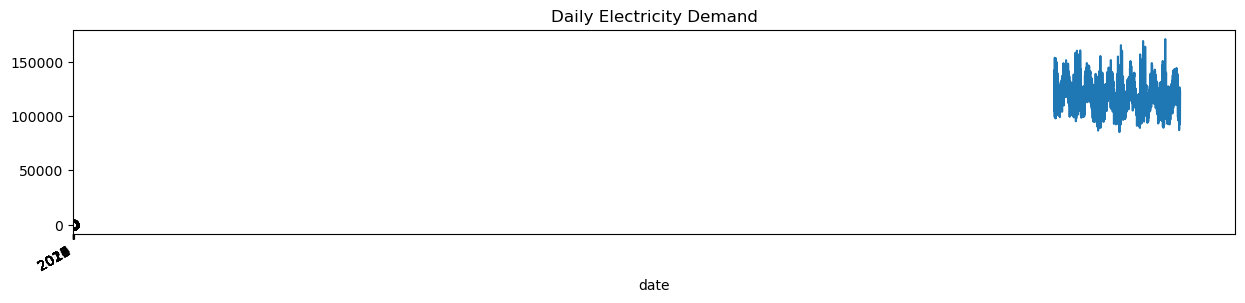

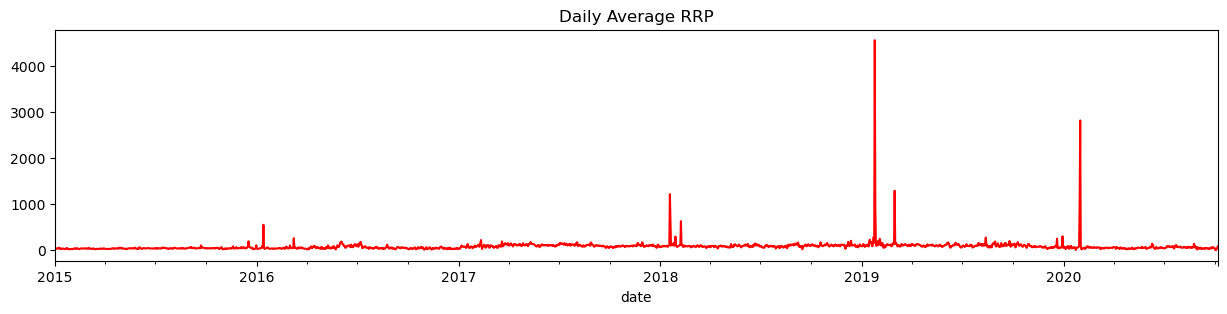

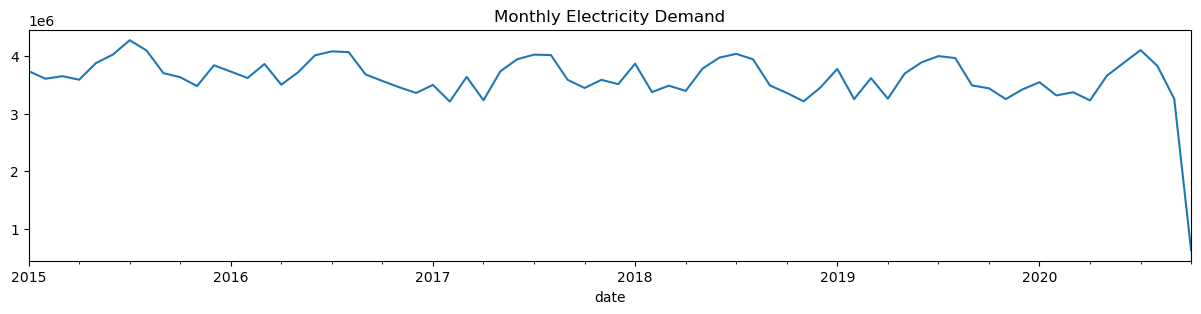

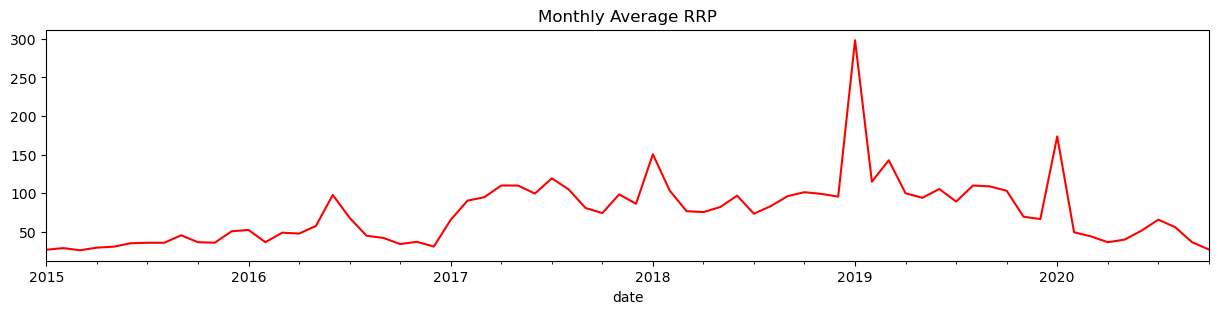

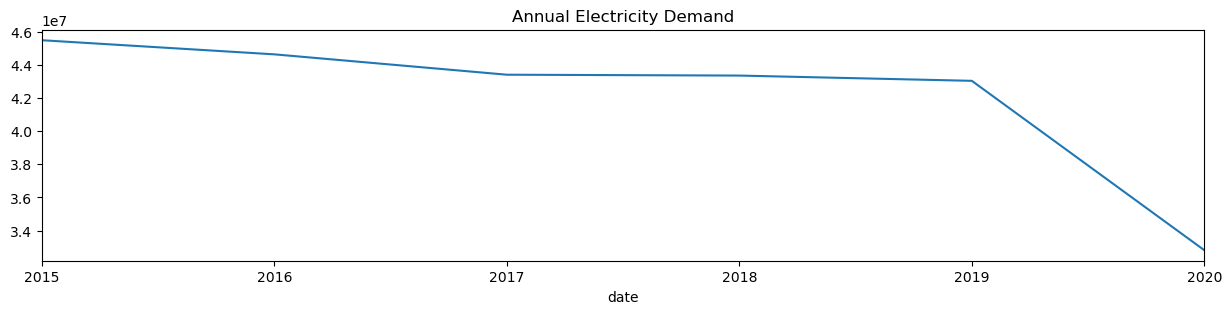

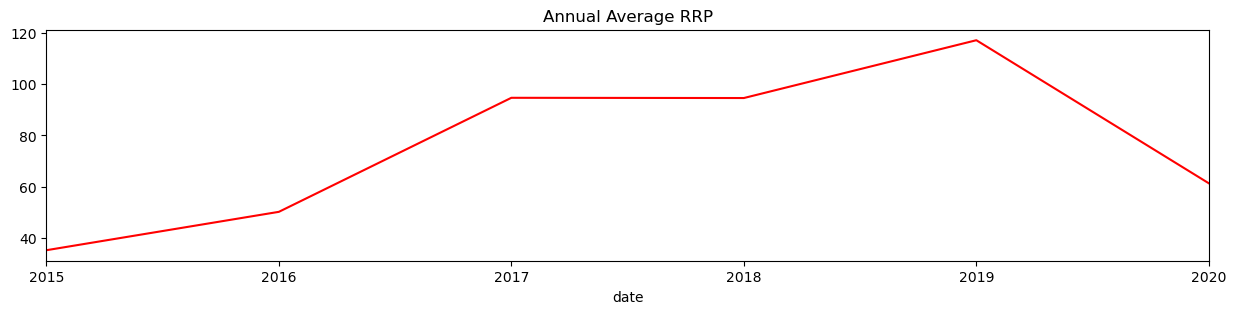

  country_name                    indicator_name     sex age_group  \
0  Afghanistan  Unemployment rate by sex and age  Female     15-24   
1  Afghanistan  Unemployment rate by sex and age  Female       25+   
2  Afghanistan  Unemployment rate by sex and age  Female  Under 15   
3  Afghanistan  Unemployment rate by sex and age    Male     15-24   
4  Afghanistan  Unemployment rate by sex and age    Male       25+   

  age_categories    2014    2015    2016    2017    2018    2019    2020  \
0          Youth  13.340  15.974  18.570  21.137  20.649  20.154  21.228   
1         Adults   8.576   9.014   9.463   9.920  11.223  12.587  14.079   
2       Children  10.306  11.552  12.789  14.017  14.706  15.418  16.783   
3          Youth   9.206  11.502  13.772  16.027  15.199  14.361  14.452   
4         Adults   6.463   6.879   7.301   7.728   7.833   7.961   8.732   

     2021    2022    2023    2024  
0  21.640  30.561  32.200  33.332  
1  14.415  23.818  26.192  28.298  
2  17.134  26.

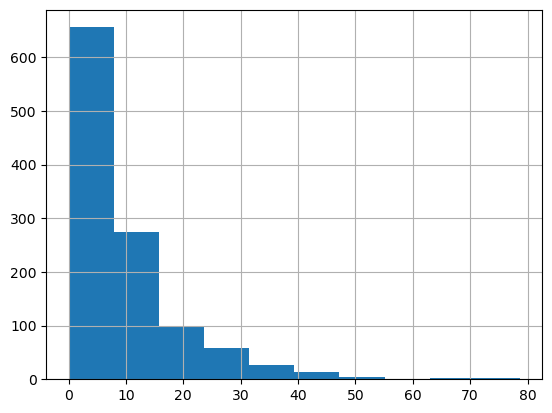

2024
(-0.0186, 19.706]    989
(19.706, 39.352]     126
(39.352, 58.998]      20
(58.998, 78.644]       4
Name: count, dtype: int64
2024
(0.059, 3.486]     285
(3.486, 6.516]     285
(6.516, 12.67]     284
(12.67, 78.644]    285
Name: count, dtype: int64


In [8]:
"""
CSC 177-01
Professor Chidella
Spring 2024
Data Preprocessing Assignment
Team Data Miners
Team Members: Tanner Colbert, Kevinpreet Deol, Julian Martinez, Curtis Berry, Shajaat Ali

"""
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tkinter as tk
from tkinter import filedialog
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

global data
global dataS
global dataE

#Reading the Data Sets from the DataSets Folder(unemployment data set, Spotify data set, electricity data set)
path = "./DataSets/"

filename_read = os.path.join(path,"global_unemployment_data_v2.csv")
df_unemployment = pd.read_csv(filename_read, na_values=['NA','?'])

filename_read = os.path.join(path,"top_50_2023.csv")
df_spotify = pd.read_csv(filename_read, na_values=['NA','?'])

filename_read = os.path.join(path,"complete_dataset.csv")
df_electricity = pd.read_csv(filename_read, na_values=['NA','?'])


#Missing Values (Tanner Colbert, unemployment data set)
print('Missing Values')
print()
data = df_unemployment
data.columns = ['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories', '2014',
                '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print(data.head())

print()
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))
    
data2 = data['2023']
print()
print('Before replacing missing values:')
print(data2[755:768])
    
data['2022'] = data['2022'].fillna(data['2022'].mean())
data['2023'] = data['2023'].fillna(data['2023'].mean())
data['2024'] = data['2024'].fillna(data['2024'].mean())

print('\nAfter replacing missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

print()
data2 = data['2023']
print(data2[755:768])
print()

#Duplicate Data (Tanner Colbert, unemployment data set)
print('Duplicate Data')
print()
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.loc[[5,6]])

print()
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))
print()

#Outliers (Tanner Colbert, unemployment data set)
print('Outliers')
print()

%matplotlib inline

data2 = data.drop(['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories'], axis=1)
data2.boxplot(figsize=(20,11))

print('Standardizing the columns:')
z = (data2-data2.mean())/data2.std()
print(z[20:25])

print()
print('Number of rows before discarding outliers = %d' % (z.shape[0]))
z2 = z.loc[((z > -3).sum(axis=1)==9) & ((z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding outliers = %d' % (z2.shape[0]))
print()

#Shuffling Data Frames (Tanner Colbert, unemployment data set)
print('Shuffling Data Frames')
print()
data2 = data.reindex(np.random.permutation(data.index))
data.reset_index(inplace=True, drop=True)
print(data2)
print()

#Sorting Data Frames (Tanner Colbert, unemployment data set)
print('Sorting Data Frames')
print()
print('Data in Descending Order via Country Name:')
data2 = data.sort_values(by='country_name', ascending=False)
print(data2)
print()
print('Data in Ascending Order via Country Name:')
print(data) #the data set is already sorted alphaetically by country_name
print()

#Saving a Data Frame (Tanner Colbert, unemployment data set)
print('Shuffling and then Saving a Data Frame')
print()
filename_write = os.path.join(path, "g_e_shuffle.csv")
data2 = data
data2 = data2.reindex(np.random.permutation(data2.index))
data2.to_csv(filename_write, index=False)
print('Saving and Shuffling Done. The g_e_shuffle.csv can be found in the DataSets folder.')
print()

#Dropping Fields (Kevinpreet Deol, unemployment data set)
print('Dropping Fields')
print()

#Feature Normalization (Kevinpreet Deol, unemployment data set)

#One Hot Encoding (Kevinpreet Deol, unemployment data set)

#Label Encoding (Kevinpreet Deol, unemployment data set)

#Training/Test Splitting and Additional Calculations (Curtis Berry, unemployment data set)

#Aggregation (Julian Martinez, electricity data set)
data = df_electricity
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

daily_demand = data['demand'].resample('D').sum()
daily_rrp = data['RRP'].resample('D').mean()

# show daily demand
ax = daily_demand.plot(kind='line', figsize=(15, 3))
ax.set_title('Daily Electricity Demand')
plt.show()

# show daily RRP
ax = daily_rrp.plot(kind='line', figsize=(15, 3), color='red')
ax.set_title('Daily Average RRP')
plt.show()

# Monthly aggregation
monthly_demand = data['demand'].resample('M').sum()
monthly_rrp = data['RRP'].resample('M').mean()

# Plot monthly demand
ax = monthly_demand.plot(kind='line', figsize=(15, 3))
ax.set_title('Monthly Electricity Demand')
plt.show()

# Plot monthly RRP
ax = monthly_rrp.plot(kind='line', figsize=(15, 3), color='red')
ax.set_title('Monthly Average RRP')
plt.show()

# Annual aggregation
annual_demand = data['demand'].resample('Y').sum()
annual_rrp = data['RRP'].resample('Y').mean()

# show annual demand
ax = annual_demand.plot(kind='line', figsize=(15, 3))
ax.set_title('Annual Electricity Demand')
plt.show()

# show annual RRP
ax = annual_rrp.plot(kind='line', figsize=(15, 3), color='red')
ax.set_title('Annual Average RRP')
plt.show()

#Sampling (Julian Martinez, unemployment data set)



data = df_unemployment
print(data.head())

# Sample 3 
sample = data.sample(n=3)
print(sample)

# Sample 1% of the data without replacement
sample_frac = data.sample(frac=0.01, random_state=1)
print(sample_frac)

# Sample 1% of the data with replacement
sample_replace = data.sample(frac=0.01, replace=True, random_state=1)
print(sample_replace)



#Discretization (Julian Martinez, unemployment data set)


data = df_unemployment
data['2024'].hist(bins=10)
plt.show()

equal_width_bins = pd.cut(data['2024'], 4)
print(equal_width_bins.value_counts(sort=False))

equal_freq_bins = pd.qcut(data['2024'], 4)
print(equal_freq_bins.value_counts(sort=False))





#Concatenation (Shajaat Ali, unemployment data set)

#Calculate Fields(Shajaat Ali, Spotify data set)

#PCA (Shajaat Ali, Spotify data set)